In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diamonds_new.csv')
df

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


###Understanding the dataset

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [ ]:
df.shape

(53940, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


###Finding missing values

In [ ]:
df.isnull().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

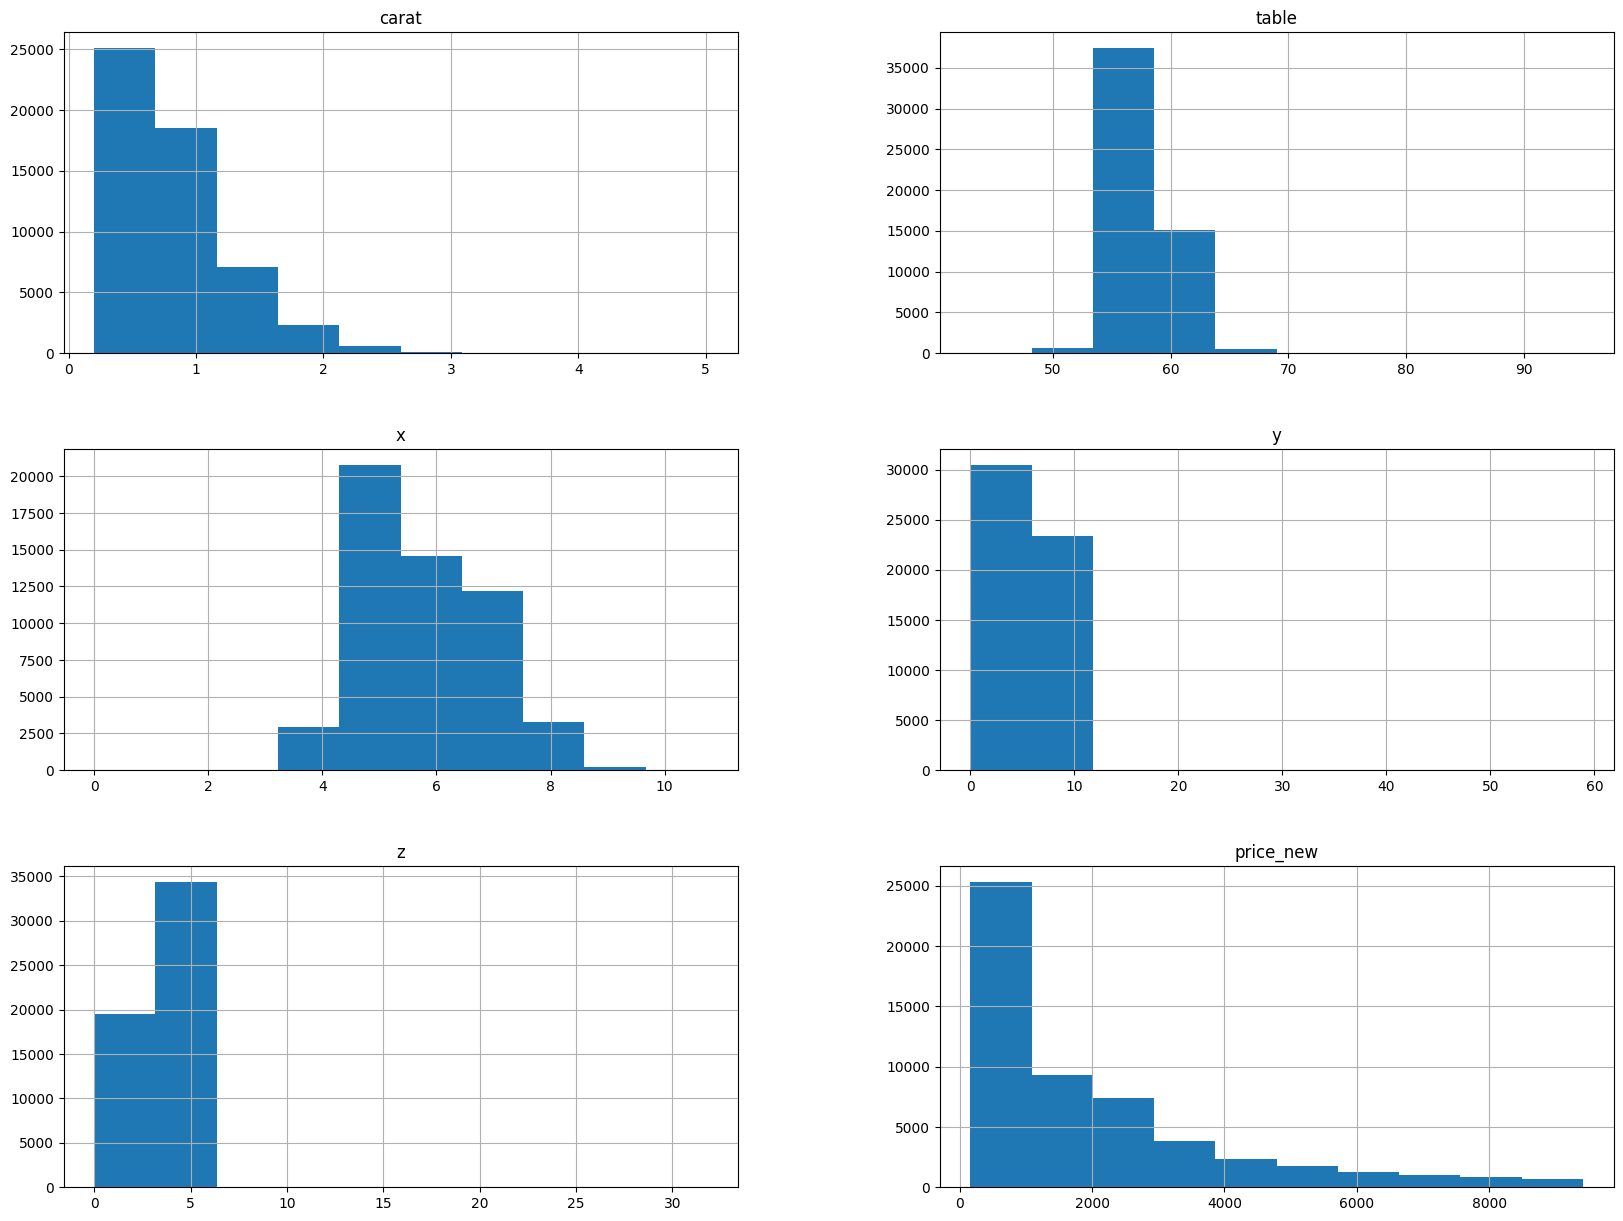

In [ ]:
freq_graph = df.select_dtypes(include='float64')
freq_graph.hist(figsize=(20,15));

##Filling Missing Values

In [ ]:
df['carat'] = df['carat'].fillna(df['carat'].median())
df['table'] =df['table'].fillna(df['table'].mean())
df['color'] = df['color'].fillna(df['color'].mode()[0])

In [ ]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

## Finding Outliers

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [ ]:
num_columns=['carat',	'table',	'x',	'y',	'z']

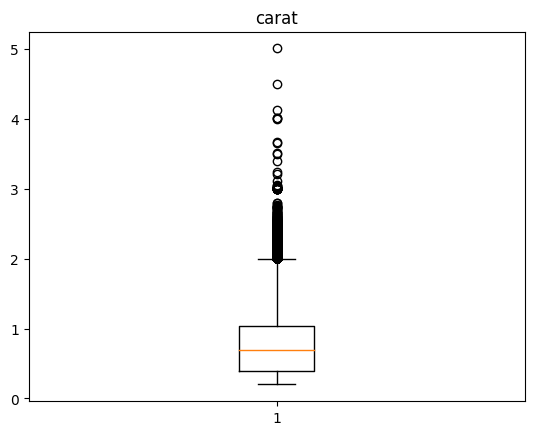

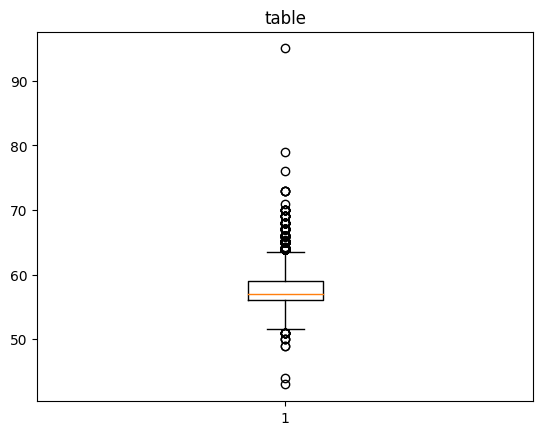

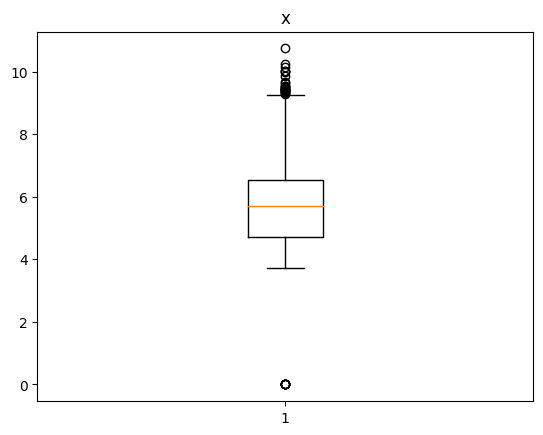

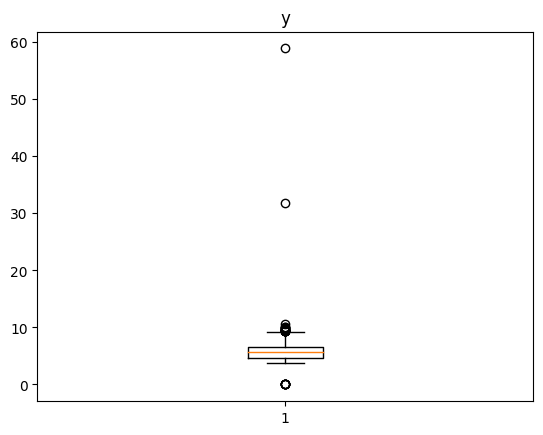

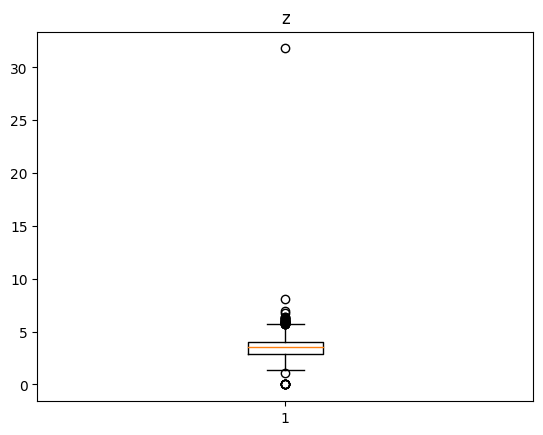

In [ ]:
for i in num_columns:
 plt.figure()
 plt.boxplot(df[i])
 plt.title(i);

In [ ]:
# for carat column
Q1=np.percentile(df['carat'],25,method='midpoint')
Q2=np.percentile(df['carat'],50,method='midpoint')
Q3=np.percentile(df['carat'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

Q1 is   0.4
Q2 is   0.7
Q3 is   1.04


In [ ]:
IQR = Q3-Q1
print(IQR)

0.64


In [ ]:
lower_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

lower whisker is  -0.5599999999999999
upper whisker is  2.0


In [ ]:
outlier=[]
for x in df['carat']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print(outlier)


[2.06, 2.14, 2.15, 2.22, 2.01, 2.01, 2.27, 2.03, 2.03, 2.06, 2.08, 2.49, 2.01, 2.14, 2.02, 2.02, 2.15, 2.03, 2.03, 2.07, 3.0, 2.21, 2.22, 2.01, 2.1, 2.1, 2.25, 2.01, 2.03, 2.17, 2.32, 2.72, 2.23, 2.11, 2.01, 2.05, 2.25, 2.27, 2.3, 2.31, 2.01, 2.04, 2.03, 2.12, 2.11, 2.5, 2.2, 2.01, 3.01, 3.0, 2.01, 2.01, 2.33, 2.04, 2.04, 2.68, 2.25, 2.5, 2.34, 2.02, 2.16, 2.5, 2.01, 2.74, 2.01, 2.16, 2.28, 2.25, 2.17, 2.02, 2.03, 2.04, 2.03, 2.01, 2.01, 2.01, 2.68, 2.43, 2.01, 2.04, 2.02, 2.01, 2.06, 2.01, 2.04, 3.11, 2.05, 2.05, 2.05, 2.02, 2.02, 2.04, 3.01, 2.06, 2.01, 2.09, 2.52, 2.19, 2.02, 2.09, 2.01, 2.01, 2.01, 2.01, 2.01, 2.04, 2.14, 2.18, 2.01, 2.01, 2.01, 2.02, 2.77, 2.63, 3.05, 2.1, 2.46, 2.01, 2.01, 2.02, 3.02, 2.63, 2.22, 2.02, 2.01, 2.01, 2.38, 2.06, 3.01, 2.01, 2.01, 2.01, 2.02, 3.0, 2.03, 2.01, 2.01, 2.24, 2.32, 2.01, 2.06, 2.3, 2.02, 2.2, 2.07, 2.01, 2.25, 2.01, 2.25, 2.01, 2.34, 2.02, 2.09, 2.2, 2.01, 2.02, 2.03, 2.01, 2.06, 2.04, 2.01, 2.34, 2.26, 2.06, 2.36, 2.04, 2.01, 2.01, 2.08,

In [ ]:
df['carat']=df['carat'].clip(lower=lower_lim, upper=Up_lim)

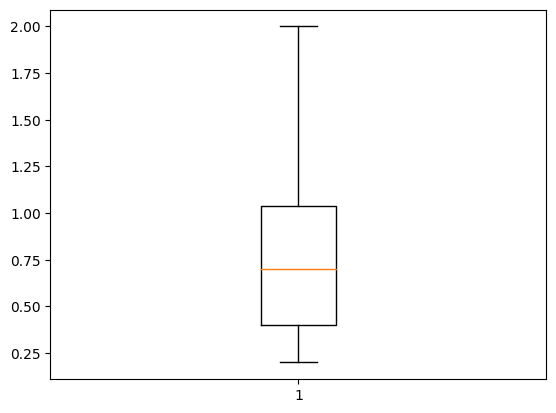

In [ ]:
plt.boxplot(df['carat'])
plt.show();

In [ ]:
# for table column
from scipy.stats import zscore
z_scores= zscore(df['table'])
print(z_scores)

0       -1.099938
1        1.585328
2        3.375506
3        0.242695
4        0.242695
           ...   
53935   -0.204849
53936   -1.099938
53937    1.137784
53938    0.242695
53939   -1.099938
Name: table, Length: 53940, dtype: float64


In [ ]:
threshold = 3

outliers_index = df.index[(z_scores > threshold) | (z_scores < -threshold)]
print(outliers_index)

Int64Index([    2,    91,   227,   296,   314,   356,   359,   526,   712,
              771,
            ...
            52865, 53064, 53154, 53226, 53503, 53542, 53660, 53695, 53697,
            53785],
           dtype='int64', length=336)


In [ ]:
df=df.drop(outliers_index)
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0


In [ ]:
df.shape

(53604, 9)

In [ ]:
# for X column
from scipy.stats import zscore
z_scores= zscore(df['x'])
print(z_scores)

0       -1.585866
1       -1.639370
3       -1.362932
4       -1.238089
5       -1.594783
           ...   
53935    0.019260
53936   -0.034244
53937   -0.060996
53938    0.375955
53939    0.090599
Name: x, Length: 53604, dtype: float64


In [ ]:
threshold = 3

outliers_index = df.index[(z_scores > threshold) | (z_scores < -threshold)]
print(outliers_index)

Int64Index([11182, 11963, 16283, 19339, 19866, 21758, 21862, 22428, 22540,
            22741, 22831, 23580, 23644, 24131, 24297, 24328, 24520, 24816,
            25460, 25850, 25998, 25999, 26100, 26243, 26431, 26444, 26467,
            26534, 26932, 27016, 27130, 27415, 27429, 27514, 27630, 27638,
            27649, 27679, 27684, 27685, 49556, 49557],
           dtype='int64')


In [ ]:
df=df.drop(outliers_index)
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0


In [ ]:
df.shape

(53562, 9)

In [ ]:
#for y column

Q1=np.percentile(df['y'],25,method='midpoint')
Q2=np.percentile(df['y'],50,method='midpoint')
Q3=np.percentile(df['y'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

Q1 is   4.72
Q2 is   5.71
Q3 is   6.54


In [ ]:
IQR = Q3-Q1
print(IQR)

1.8200000000000003


In [ ]:
lower_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

lower whisker is  1.9899999999999993
upper whisker is  9.27


In [ ]:
outlier=[]
for x in df['y']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print(outlier)


[58.9, 31.8]


In [ ]:
df['y']=df['y'].clip(lower=lower_lim, upper=Up_lim)

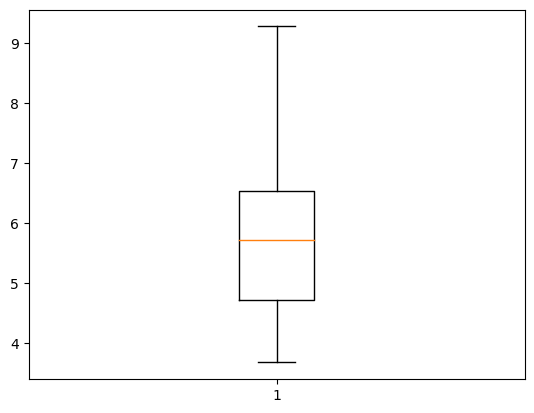

In [ ]:
plt.boxplot(df['y'])
plt.show();

In [ ]:
#for z column
z_scores= zscore(df['z'])
print(z_scores)

0       -1.580963
1       -1.752219
3       -1.295537
4       -1.124281
5       -1.509606
           ...   
53935   -0.053933
53936    0.103051
53937    0.031694
53938    0.288578
53939    0.145865
Name: z, Length: 53562, dtype: float64


In [ ]:
threshold = 3

outliers_index = df.index[(z_scores > threshold) | (z_scores < -threshold)]
print(outliers_index)

Int64Index([14635, 17196, 19346, 20462, 21654, 24067, 26194, 26744, 26933,
            27515, 27516, 27517, 27518, 48410],
           dtype='int64')


In [ ]:
df=df.drop(outliers_index)
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0


In [ ]:
df.shape

(53548, 9)

##Corelation

In [ ]:
df.corr()

<ipython-input-48-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,table,x,y,z,price_new
carat,1.000000,0.187063,0.983290,0.982396,0.981768,0.922516
table,0.187063,1.000000,0.196743,0.191569,0.159495,0.131529
x,0.983290,0.196743,1.000000,0.998564,0.991384,0.887235
y,0.982396,0.191569,0.998564,1.000000,0.991036,0.888607
z,0.981768,0.159495,0.991384,0.991036,1.000000,0.881830
price_new,0.922516,0.131529,0.887235,0.888607,0.881830,1.000000


<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

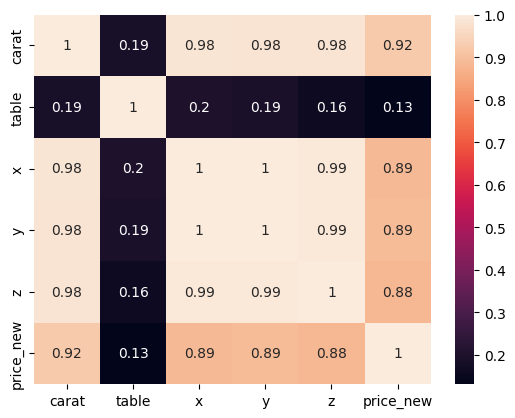

In [ ]:
sns.heatmap(df.corr(),annot=True)

##Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53548 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53548 non-null  float64
 1   cut        53548 non-null  object 
 2   color      53548 non-null  object 
 3   clarity    53548 non-null  object 
 4   table      53548 non-null  float64
 5   x          53548 non-null  float64
 6   y          53548 non-null  float64
 7   z          53548 non-null  float64
 8   price_new  53548 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['color']=le.fit_transform(df['color'])

In [ ]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,1,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,1,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,5,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,6,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,6,VVS2,57.0,3.94,3.96,2.48,168.0


In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
#label encoding
df['clarity']=le.fit_transform(df['clarity'])

In [ ]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,1,2,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,6,3,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,6,7,57.0,3.94,3.96,2.48,168.0


In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
# one hot encoding encoding
df=pd.get_dummies(df)

In [ ]:
df.head()

,carat,color,clarity,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,55.0,3.95,3.98,2.43,163.0,0,0,1,0,0
1,0.21,1,2,61.0,3.89,3.84,2.31,163.0,0,0,0,1,0
3,0.29,5,5,58.0,4.20,4.23,2.63,167.0,0,0,0,1,0
4,0.31,6,3,58.0,4.34,4.35,2.75,167.5,0,1,0,0,0
5,0.24,6,7,57.0,3.94,3.96,2.48,168.0,0,0,0,0,1


##Standardized Scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53548 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53548 non-null  float64
 1   color          53548 non-null  int64  
 2   clarity        53548 non-null  int64  
 3   table          53548 non-null  float64
 4   x              53548 non-null  float64
 5   y              53548 non-null  float64
 6   z              53548 non-null  float64
 7   price_new      53548 non-null  float64
 8   cut_Fair       53548 non-null  uint8  
 9   cut_Good       53548 non-null  uint8  
 10  cut_Ideal      53548 non-null  uint8  
 11  cut_Premium    53548 non-null  uint8  
 12  cut_Very Good  53548 non-null  uint8  
dtypes: float64(6), int64(2), uint8(5)
memory usage: 3.9 MB


In [ ]:
df.describe()

,carat,color,clarity,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
count,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000
mean,0.790584,2.592347,3.838948,57.404285,5.726030,5.728395,3.536834,1960.511989,0.026051,0.089116,0.402275,0.257171,0.225387
std,0.455814,1.700217,1.723946,2.120594,1.115006,1.107400,0.688935,1989.232505,0.159290,0.284914,0.490361,0.437079,0.417841
min,0.200000,0.000000,0.000000,51.000000,3.730000,3.680000,1.530000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000,472.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,3.000000,4.000000,57.000000,5.690000,5.710000,3.520000,1198.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,4.000000,5.000000,59.000000,6.540000,6.530000,4.030000,2657.625000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000,6.000000,7.000000,64.000000,9.080000,9.270000,5.610000,9411.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df.drop(['carat','table','color','clarity','price_new','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good'],axis=1)

In [ ]:
X

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
5,3.94,3.96,2.48
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


In [ ]:
X.describe()

,x,y,z
count,53548.000000,53548.000000,53548.000000
mean,5.726030,5.728395,3.536834
std,1.115006,1.107400,0.688935
min,3.730000,3.680000,1.530000
25%,4.710000,4.720000,2.910000
50%,5.690000,5.710000,3.520000
75%,6.540000,6.530000,4.030000
max,9.080000,9.270000,5.610000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_sc = sc.fit_transform(X)

In [ ]:
X_sc = pd.DataFrame(X_sc)

In [ ]:
X_sc

,0,1,2
0,-1.592859,-1.578843,-1.606603
1,-1.646671,-1.705266,-1.780786
2,-1.368643,-1.353087,-1.316297
3,-1.243082,-1.244724,-1.142113
4,-1.601828,-1.596903,-1.534026
...,...,...,...
53543,0.021498,0.028541,-0.053466
53544,-0.032314,0.019510,0.106203
53545,-0.059220,-0.043701,0.033626
53546,0.380244,0.353629,0.294901


In [ ]:
X_sc.describe()

,0,1,2
count,5.354800e+04,5.354800e+04,5.354800e+04
mean,1.443696e-16,2.292929e-16,-3.099701e-16
std,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.790169e+00,-1.849750e+00,-2.912980e+00
25%,-9.112419e-01,-9.106047e-01,-9.098683e-01
50%,-3.231430e-02,-1.661070e-02,-2.443513e-02
75%,7.300208e-01,7.238692e-01,7.158451e-01
max,3.008058e+00,3.198156e+00,3.009262e+00


##MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_mn = minmax.fit_transform(X)
X_mn = pd.DataFrame(X_mn)

In [ ]:
X_mn.describe()

,0,1,2
count,53548.000000,53548.000000,53548.000000
mean,0.373090,0.366439,0.491871
std,0.208412,0.198104,0.168857
min,0.000000,0.000000,0.000000
25%,0.183178,0.186047,0.338235
50%,0.366355,0.363148,0.487745
75%,0.525234,0.509839,0.612745
max,1.000000,1.000000,1.000000


##Normalization

In [ ]:
import sklearn
X_norm = sklearn.preprocessing.normalize(X)
X_norm = pd.DataFrame(X_norm)

In [ ]:
X_norm.describe()

,0,1,2
count,53548.000000,53548.000000,53548.000000
mean,0.647764,0.648205,0.400171
std,0.003950,0.004194,0.007921
min,0.437337,0.475624,0.143426
25%,0.645248,0.645667,0.396363
50%,0.647347,0.648812,0.400676
75%,0.650109,0.650689,0.404373
max,0.781304,0.787207,0.580020


<function matplotlib.pyplot.show(close=None, block=None)>

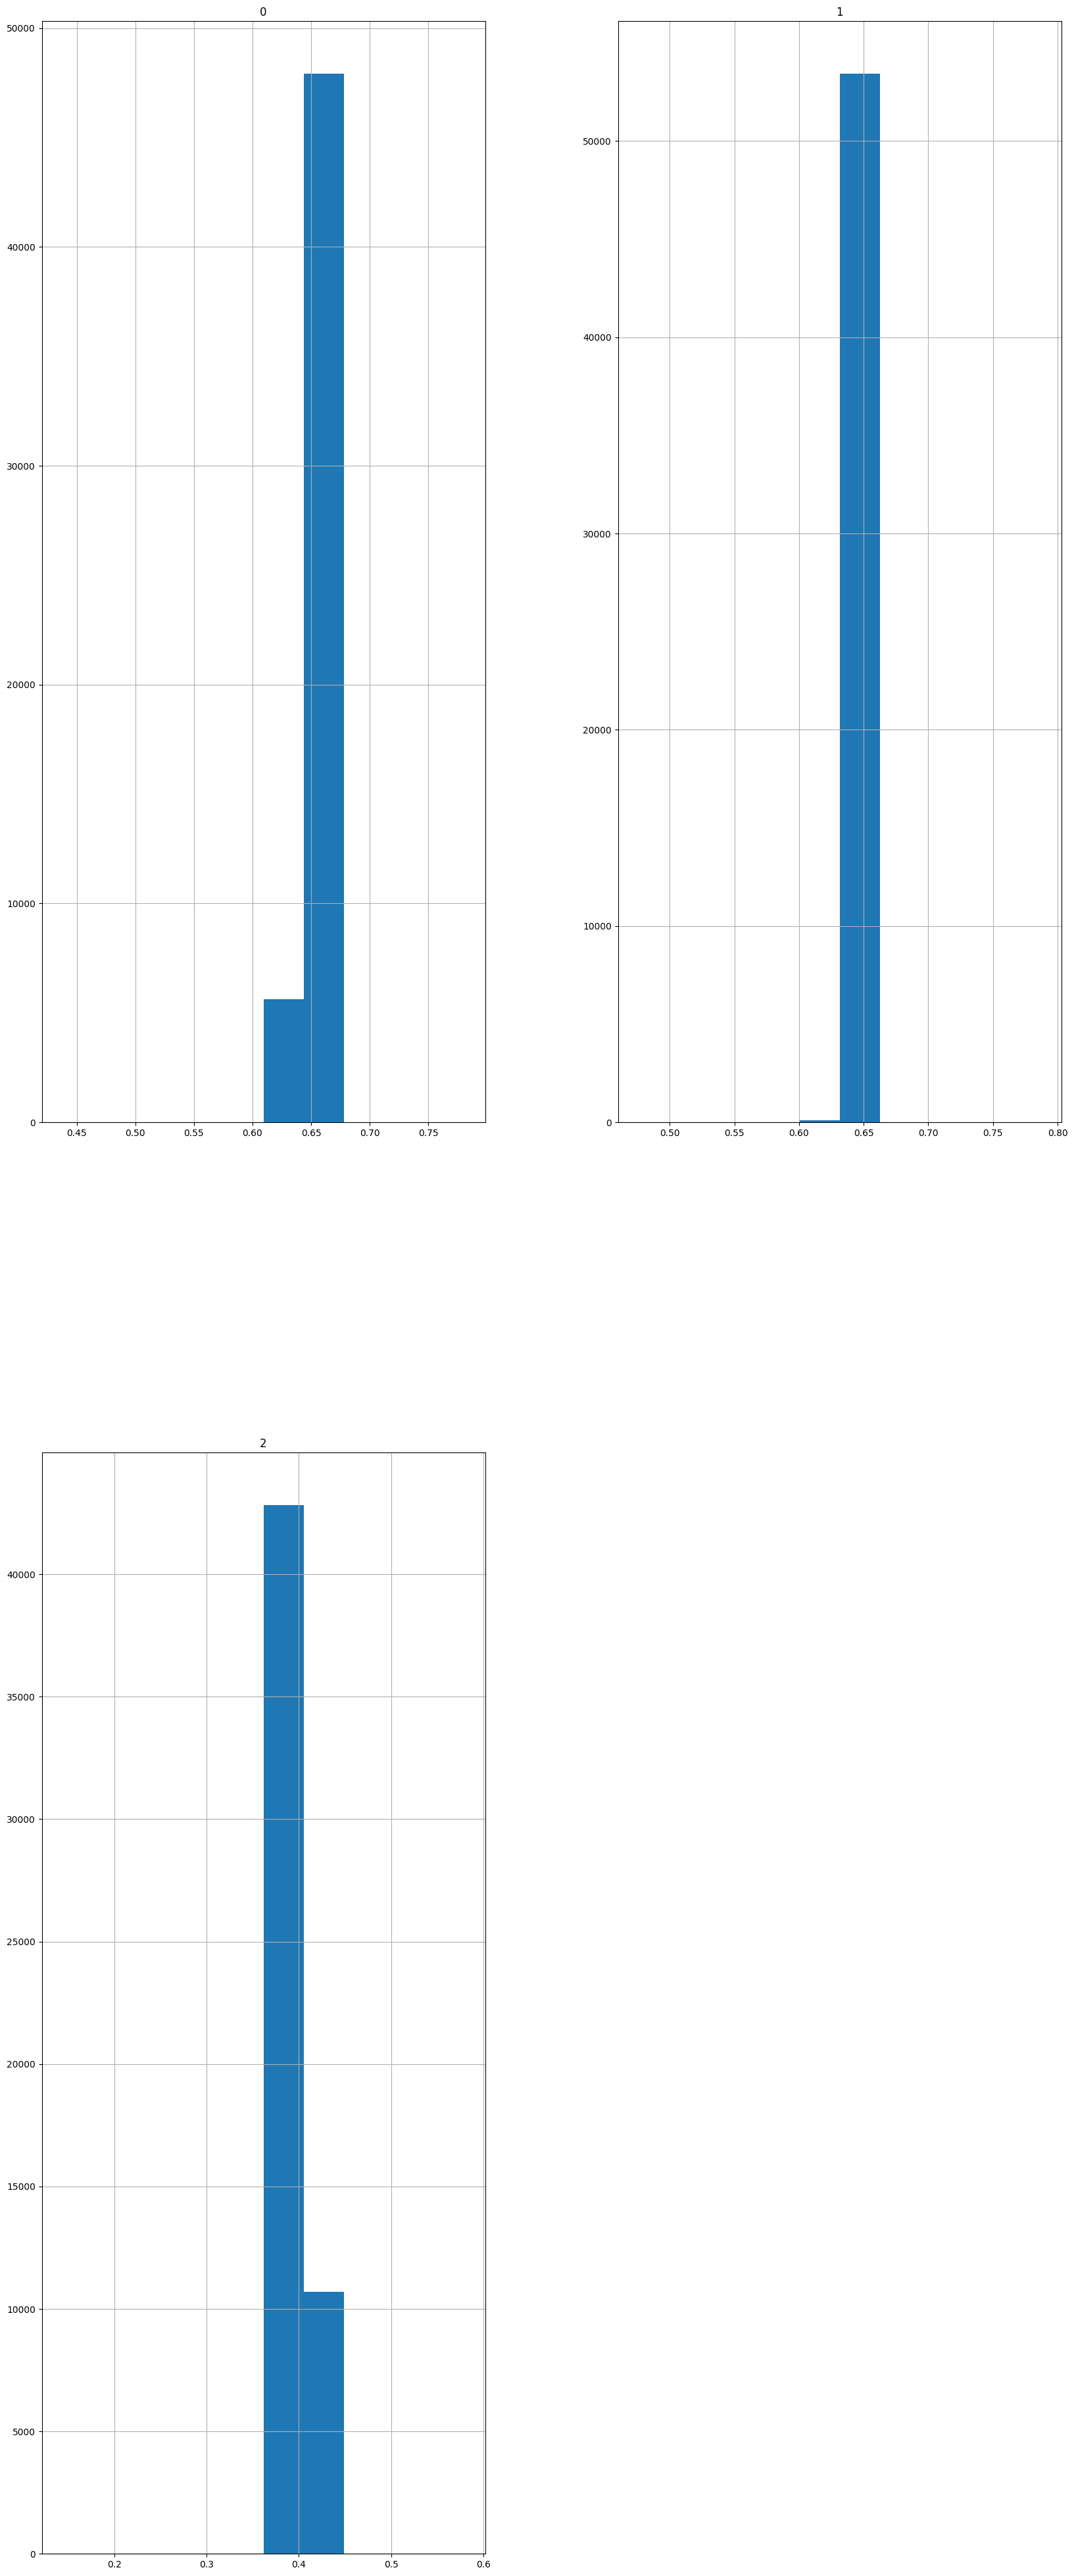

In [ ]:
X_norm.hist(figsize=(20,50))
plt.show